In [1]:
import nltk
import spacy
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from gensim import corpora, models
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import networkx as nx
from datasets import Dataset
from transformers import AutoTokenizer,AutoModelForSequenceClassification,TrainingArguments,Trainer

c:\Users\NITRO V 15\anaconda3\envs\ai\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to C:\Users\NITRO V
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NITRO V 15\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\NITRO V
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\NITRO V
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
nlp_normal = spacy.load("en_core_web_sm")

In [5]:
student_answer = "The earth is round. It revolves around the sun.  Sometimes it's hot." 
correct_answer = "The Earth is a planet in our solar system. It is spherical in shape and revolves around the Sun. This revolution causes the seasons, with varying temperatures depending on the Earth's tilt and position in its orbit."


In [7]:
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char == ' ' or char == '-'])
    text = ' '.join(text.split()) 
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

In [55]:
student_answer_processed = preprocess_text(student_answer)
correct_answer_processed = preprocess_text(correct_answer)

In [56]:
correct_tokens = nlp_normal(correct_answer_processed)
student_tokens = nlp_normal(student_answer_processed)

In [62]:
correct_tokens

earth planet solar system spherical shape revolves around sun revolution causes seasons varying temperatures depending earths tilt position orbit

In [57]:
print(correct_tokens)
print()
print(student_tokens)

earth planet solar system spherical shape revolves around sun revolution causes seasons varying temperatures depending earths tilt position orbit

earth round revolves around sun sometimes hot


In [58]:
correct_embedding = np.mean([token.vector for token in correct_tokens if token.has_vector], axis=0)
student_embedding = np.mean([token.vector for token in student_tokens if token.has_vector], axis=0)


In [60]:
# print(correct_embedding)
# print()
# print(student_embedding)

Semantic Similarity: 0.5656784


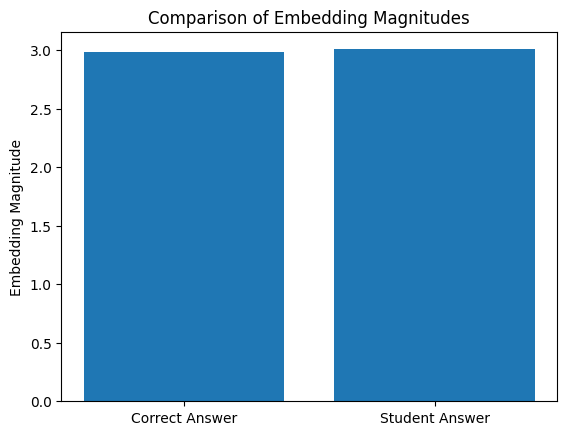

In [61]:
if not np.isnan(correct_embedding).any() and not np.isnan(student_embedding).any():  # Check for valid vectors
    similarity = cosine_similarity(correct_embedding.reshape(1, -1), student_embedding.reshape(1, -1))[0][0]
    print("Semantic Similarity:", similarity)

    # Example Visualization (Bar chart)
    labels = ['Correct Answer', 'Student Answer']
    embeddings = [np.linalg.norm(correct_embedding), np.linalg.norm(student_embedding)] #magnitude of vectors

    plt.bar(labels, embeddings)
    plt.ylabel('Embedding Magnitude')
    plt.title('Comparison of Embedding Magnitudes')
    plt.show()
else:
    print("Could not calculate semantic similarity due to missing word vectors.")

In [44]:
# 3.4 Topic Modeling (Simplified Example)
documents = [correct_answer_processed, student_answer_processed]
dictionary = corpora.Dictionary(doc.split() for doc in documents)
corpus = [dictionary.doc2bow(doc.split()) for doc in documents]
lda_model = models.LdaModel(corpus, num_topics=2, id2word=dictionary)

In [45]:
print("LDA Topics:")
for topic in lda_model.show_topics():
    print(topic)

LDA Topics:
(0, '0.070*"earth" + 0.067*"around" + 0.067*"revolves" + 0.063*"sun" + 0.047*"sometimes" + 0.045*"hot" + 0.044*"planet" + 0.043*"orbit" + 0.042*"round" + 0.041*"varying"')
(1, '0.062*"sun" + 0.057*"revolves" + 0.056*"around" + 0.053*"earth" + 0.047*"earths" + 0.046*"seasons" + 0.046*"spherical" + 0.045*"depending" + 0.045*"shape" + 0.045*"tilt"')


In [47]:
# Keyword/Concept Matching (Simplified)
correct_keywords = set(correct_answer_processed.split())
student_keywords = set(student_answer_processed.split())
missing_keywords = correct_keywords - student_keywords
print("Missing Keywords:", missing_keywords)

Missing Keywords: {'temperatures', 'causes', 'shape', 'revolution', 'depending', 'system', 'earths', 'solar', 'seasons', 'spherical', 'orbit', 'tilt', 'varying', 'position', 'planet'}


In [46]:
# Sentiment Analysis (Simplified Example - using TextBlob)
from textblob import TextBlob
correct_sentiment = TextBlob(correct_answer).sentiment.polarity
student_sentiment = TextBlob(student_answer).sentiment.polarity
print("Correct Answer Sentiment:", correct_sentiment)
print("Student Answer Sentiment:", student_sentiment)

Correct Answer Sentiment: 0.0
Student Answer Sentiment: 0.024999999999999994


In [18]:
print(student_answer_processed)
print()
print(correct_answer_processed)

earth round revolves around sun sometimes hot

earth planet solar system spherical shape revolves around sun revolution causes seasons varying temperatures depending earths tilt position orbit


In [13]:
student_tokens = nltk.word_tokenize(student_answer_processed)
correct_tokens = nltk.word_tokenize(correct_answer_processed)

In [50]:
print(student_tokens)
print()
print(correct_tokens)

['earth', 'round', 'revolves', 'around', 'sun', 'sometimes', 'hot']

['earth', 'planet', 'solar', 'system', 'spherical', 'shape', 'revolves', 'around', 'sun', 'revolution', 'causes', 'seasons', 'varying', 'temperatures', 'depending', 'earths', 'tilt', 'position', 'orbit']


In [20]:
student_pos = nltk.pos_tag(student_answer_processed.split())
correct_pos = nltk.pos_tag(correct_answer_processed.split())

In [21]:
print(student_pos)
print()
print(correct_pos)

[('earth', 'NN'), ('round', 'NN'), ('revolves', 'VBZ'), ('around', 'IN'), ('sun', 'NN'), ('sometimes', 'RB'), ('hot', 'JJ')]

[('earth', 'NN'), ('planet', 'NN'), ('solar', 'NN'), ('system', 'NN'), ('spherical', 'JJ'), ('shape', 'NN'), ('revolves', 'VBZ'), ('around', 'IN'), ('sun', 'JJ'), ('revolution', 'NN'), ('causes', 'NNS'), ('seasons', 'NNS'), ('varying', 'VBG'), ('temperatures', 'NNS'), ('depending', 'VBG'), ('earths', 'NNS'), ('tilt', 'JJ'), ('position', 'NN'), ('orbit', 'NN')]


In [29]:
# Use the original, not preprocessed text for NER
# student_ner = nlp(student_answer).ents  
# correct_ner = nlp(correct_answer).ents

In [ ]:
from transformers import BertTokenizer, BertForTokenClassification
from transformers import pipeline

# Step 1: Load a Pre-trained BERT Tokenizer and Model for NER
model_name = "dbmdz/bert-large-cased-finetuned-conll03-english"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForTokenClassification.from_pretrained(model_name)

# Step 2: Create a NER pipeline
nlp = pipeline("ner", model=model, tokenizer=tokenizer)


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [34]:
student_ner = nlp(student_answer)  
correct_ner = nlp(correct_answer)

In [35]:
print(student_ner)
print()
print(correct_ner)

[]

[{'entity': 'I-LOC', 'score': 0.91113573, 'index': 2, 'word': 'Earth', 'start': None, 'end': None}, {'entity': 'I-LOC', 'score': 0.6010872, 'index': 20, 'word': 'Sun', 'start': None, 'end': None}, {'entity': 'I-LOC', 'score': 0.7849307, 'index': 34, 'word': 'Earth', 'start': None, 'end': None}]


In [37]:
# Step 4: Display the results
for entity in correct_ner:
    print(f"Word: {entity['word']}, Entity: {entity['entity']}, Score: {entity['score']}")

Word: Earth, Entity: I-LOC, Score: 0.911135733127594
Word: Sun, Entity: I-LOC, Score: 0.601087212562561
Word: Earth, Entity: I-LOC, Score: 0.7849307060241699


In [38]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([student_answer_processed, correct_answer_processed])
similarity = cosine_similarity(vectors[0], vectors[1])[0][0]

print(f"Semantic Similarity: {similarity}")

Semantic Similarity: 0.21893218489401248


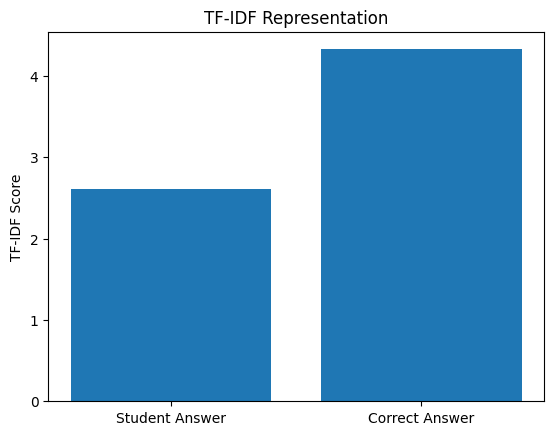

In [39]:
plt.bar(['Student Answer', 'Correct Answer'], [vectors[0].sum(), vectors[1].sum()])
plt.title('TF-IDF Representation')
plt.ylabel('TF-IDF Score')
plt.show()

In [40]:
# (This part requires integration with a QA system like BERT QA.  The example is simplified)
student_answer_contains_round = "round" in student_answer_processed
correct_answer_contains_round = "round" in correct_answer_processed

print(f"Student Answer Contains 'round': {student_answer_contains_round}")
print(f"Correct Answer Contains 'round': {correct_answer_contains_round}")

Student Answer Contains 'round': True
Correct Answer Contains 'round': True


In [41]:
knowledge_gaps = []
if not student_answer_contains_round:
    knowledge_gaps.append("Missing concept: Earth's shape (spherical)")
if similarity < 0.5: # Example threshold
    knowledge_gaps.append("Low overall understanding of Earth's characteristics")

print("Knowledge Gaps:", knowledge_gaps)

Knowledge Gaps: ["Low overall understanding of Earth's characteristics"]


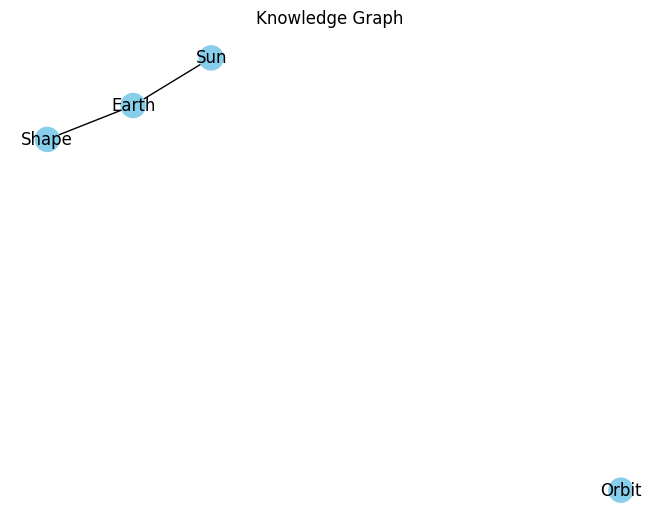

In [42]:
knowledge_graph = nx.Graph()
knowledge_graph.add_node("Earth")
knowledge_graph.add_node("Sun")
knowledge_graph.add_node("Shape")
knowledge_graph.add_node("Orbit")
knowledge_graph.add_edge("Earth", "Sun", relation="Revolves around")
knowledge_graph.add_edge("Earth", "Shape", relation="Is spherical")

# Highlight missing concepts in the graph (example)
if "Missing concept: Earth's shape (spherical)" in knowledge_gaps:
    knowledge_graph.nodes["Shape"]['color'] = 'red'  # Mark missing concept in red

nx.draw(knowledge_graph, with_labels=True, node_color=[knowledge_graph.nodes[node].get('color', 'skyblue') for node in knowledge_graph.nodes])
plt.title("Knowledge Graph")
plt.show()

In [43]:
# Example (Illustrative - needs real data):
true_positives = 5  # Correctly identified knowledge gaps
false_positives = 2  # Incorrectly identified knowledge gaps
false_negatives = 3  # Missed knowledge gaps

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * precision * recall / (precision + recall)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.7142857142857143
Recall: 0.625
F1-score: 0.6666666666666666
